In [1]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot  as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Imported!")

Imported!


In [2]:
file = pd.read_csv("./heart-missing-classification-dataset.csv")
file.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [3]:
x = file.drop("target",axis=1)
y = file["target"]

In [19]:
import random
x.fillna(x.mean(),inplace=True) # x = x.fillna(x.mean())
y.fillna(random.randint(0,1),inplace=True) # y = y.fillna(random.randint(0,1))
y.isna().sum()
x.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
# np.random.seed(50)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)
len(x_train),len(x)

(242, 303)

In [25]:
#for naive bayes
from sklearn import naive_bayes
model_NB = naive_bayes.BernoulliNB()
model_NB.fit(x_train,y_train)

BernoulliNB()

In [27]:
print(f"The model's Accuracy with Naive Bayes algorithm is: {model_NB.score(x_test,y_test)*100:.2f}%")
nb = model_NB.score(x_test,y_test)*100

The model's Accuracy with Naive Bayes algorithm is: 75.41%


In [8]:
from sklearn import svm

# Set the 'dual' parameter explicitly and increase 'max_iter'
model_SVM = svm.LinearSVC(dual=False, max_iter=100)  # You can adjust max_iter as needed

model_SVM.fit(x_train, y_train)


LinearSVC(dual=False, max_iter=100)

In [9]:
print(f"The model's Accuracy with SVM algorithm is: {model_SVM.score(x_test,y_test)*100:.2f}%")
svm =model_SVM.score(x_test,y_test)*100

The model's Accuracy with SVM algorithm is: 72.13%


In [10]:
# using KNN 

from sklearn import neighbors

model_KNN = neighbors.KNeighborsClassifier(n_neighbors=7) #this(n_neighbors) number can vary choose your number.

model_KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
print(f"The model's Accuracy with KNN algorithm is: {model_KNN.score(x_test,y_test)*100:.2f}%")
knn = model_KNN.score(x_test,y_test)*100

The model's Accuracy with KNN algorithm is: 72.13%


In [12]:
# using Decision Tree

from sklearn import tree

model_DT = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=2) #number can vary, and is optional

model_DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2)

In [13]:
print(f"The model's Accuracy with Decision Tree algorithm is: {model_DT.score(x_test,y_test)*100:.2f}%")
dt = model_DT.score(x_test,y_test)*100

The model's Accuracy with Decision Tree algorithm is: 68.85%


In [14]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=200) #optional can vary.

model_RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [15]:
print(f"The model's Accuracy with RandomForest Classifier algorithm is: {model_RF.score(x_test,y_test)*100:.2f}%")
rf = model_RF.score(x_test,y_test)*100

The model's Accuracy with RandomForest Classifier algorithm is: 68.85%


In [16]:
# ANN

np.random.seed(50)
# Build an ANN model
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
ann = test_accuracy*100


Epoch 1/50
8/8 [==============================] - 1s 38ms/step - loss: 4.9467 - accuracy: 0.4256 - val_loss: 3.1523 - val_accuracy: 0.4590
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 2.6086 - accuracy: 0.4008 - val_loss: 2.1353 - val_accuracy: 0.4918
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 2.0538 - accuracy: 0.3719 - val_loss: 1.3177 - val_accuracy: 0.3934
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4658 - accuracy: 0.4050 - val_loss: 1.4197 - val_accuracy: 0.5082
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 1.1040 - accuracy: 0.5248 - val_loss: 0.8313 - val_accuracy: 0.5738
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7751 - accuracy: 0.5826 - val_loss: 0.7883 - val_accuracy: 0.5902
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6229 - accuracy: 0.6694 - val_loss: 0.6800 - val_accuracy: 0.6557
Epoch 8/50
8/8 [=================

In [17]:
model_scores = {
    'Model': ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','ANN'],
    'Score': [nb, svm, knn, dt, rf,ann]
}

scores_df = pd.DataFrame(model_scores)

scores_df

,Model,Score
0,Naive Bayes,75.409836
1,SVM,72.131148
2,KNN,72.131148
3,Decision Tree,68.852459
4,Random Forest,68.852459
5,ANN,70.491803


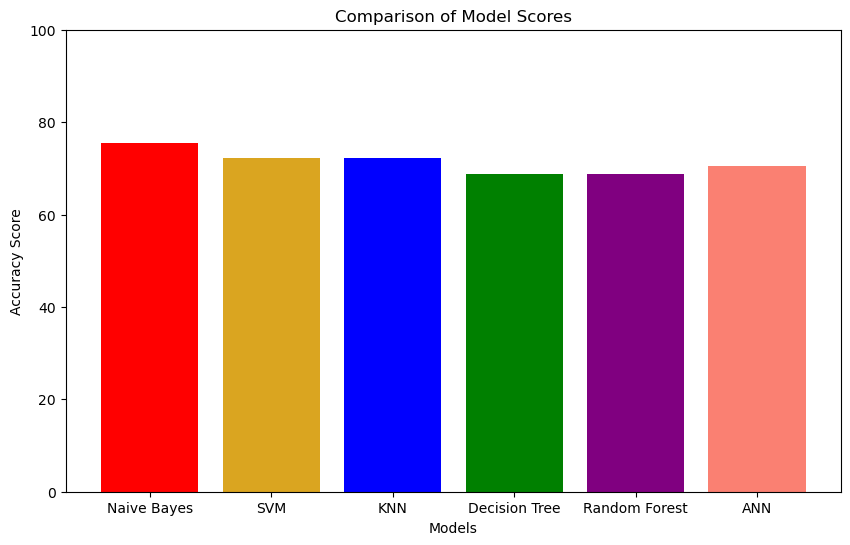

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['Score'], color=["red","goldenrod","blue","green","purple","salmon"])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Scores')
plt.ylim(0, 100)  # Assuming scores are between 0 and 1 (accuracy)
plt.show()